In [6]:
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!    ALL DATA IS FOR LA COUNTY        !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


fire_data = pd.read_csv("la_fires_incidents.csv")
spi_data = pd.read_csv("spi_rainfall_data.csv")

fire_data = fire_data.rename(
    columns={
        'July': 'Jul', 'August': 'Aug', 'September': 'Sep', 
        'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
    }
)

spi_data = spi_data[spi_data['Year']>=2014]

# Melt the DataFrame to convert from wide to long format
fire_data_long = fire_data.melt(
    id_vars=['Year'],  # Columns to keep fixed
    var_name='Month',  # Name of the new column for months
    value_name='Acreage_Burnt'  # Name of the new column for acreage
)


# Melt the SPI data to convert from wide to long format
spi_data_long = spi_data.melt(
    id_vars=['Year'],  # Keep the 'Year' column fixed
    value_vars=['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  # Months to unpivot
    var_name='Month',  # Name for the new 'Month' column
    value_name='Rainfall'  # Name for the new 'SPI' values column
)

comparison_data = spi_data_long.merge(fire_data_long, on = ['Year','Month'])




In [7]:


def fire_against_rain(year):
    # Filter data for the specified year
    year_data = comparison_data[comparison_data['Year'] == year]
    

    # Create the figure and primary y-axis
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot Rainfall (primary y-axis)
    ax1.plot(year_data['Month'], year_data['Rainfall'], color='blue', marker='o', label='Rainfall (inches)')
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Rainfall (inches)', color='blue', fontsize=12)
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.grid(alpha=.8)

    # Create the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(year_data['Month'], year_data['Acreage_Burnt'], color='red', marker='^', label='Acreage Burnt')
    ax2.set_ylabel('Acreage Burnt', color='red', fontsize=12)
    ax2.tick_params(axis='y', labelcolor='red')

    # Add title and legend
    fig.suptitle(f'Rainfall vs. Fires in {year}', fontsize=16)
    fig.tight_layout()  # Adjust layout to prevent overlap

    plt.show()

# fire_against_rain(2021)


In [8]:
def r_weather(year):
    weather = comparison_data[comparison_data['Year'] == year]
    rain = weather['Rainfall']
    acres = weather['Acreage_Burnt']
    return np.corrcoef(rain, acres)[0,1]
    

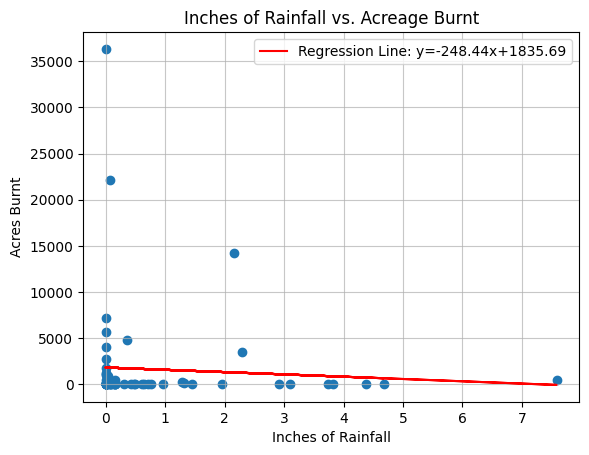

In [9]:
avg_weather = comparison_data#.groupby('Month').mean().drop(columns='Year')
rain = avg_weather['Rainfall']
acres = avg_weather['Acreage_Burnt']


plt.scatter(rain,acres)
plt.title('Inches of Rainfall vs. Acreage Burnt')
plt.xlabel('Inches of Rainfall')
plt.ylabel('Acres Burnt')

m, b = np.polyfit(rain, acres, 1)  # m = slope, b = intercept
regression_line = m * rain + b
plt.plot(rain, regression_line, color='red', label=f'Regression Line: y={m:.2f}x+{b:.2f}')


plt.grid(alpha=0.7)
plt.legend()
plt.show()


In [10]:
np.corrcoef(rain, acres)[0,1]

-0.06449979148850693